# Коррекция яркости и цвета

In [51]:
from skimage.io import imread, imshow,imsave
from skimage.transform import resize
from numpy import clip
from numpy import dstack
from numpy import array_equal

import matplotlib.pyplot as plt

### Автоконтраст черно-белого изображения

Прочитайте изображение из файла img.png. Примените к нему линейное выравнивание яркости: примените к каждому пикселю функцию

f(x)=(x−xmin)⋅255xmax−xmin
После вычисления функции значения изображения окажутся вещественными. Чтобы привести их к целым числам, используйте метод img.astype('uint8'), который возвращает изображение в целых числах. Результат сохраните в файл out_img.png.
В примере входа и выхода указаны ссылки на файлы. Скачав эти файлы, можно протестировать свою программу. Для сравнения вашего ответа с верным используйте функцию numpy.array_equal.

In [3]:
img=imread('https://stepik.org/media/attachments/lesson/58402/tiger-low-contrast.png')
img=img.astype('float')

D:\Anaconda\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
D:\Anaconda\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:77: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


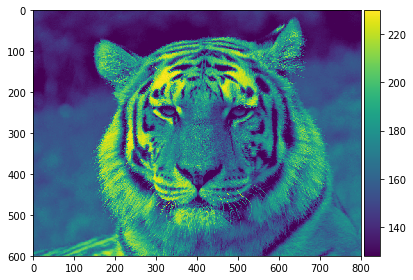

In [4]:
imshow(img)

In [5]:
mx,mn=max(img.ravel()),min(img.ravel())
nimg=(img-mn)*(255/(mx-mn))
nimg=nimg.astype('uint8')

timg=imread('https://stepik.org/media/attachments/lesson/58402/tiger-high-contrast.png')
array_equal(nimg,timg)

True

### Подсчет минимума и максимума устойчивого автоконтраста

Прочитайте изображение из файла img.png. Подсчитайте минимум и максимум яркости для стабильного автоконтраста этого изображения. Необходимо отбросить 5% самых светлых и 5% самых темных пикселей. Для получения числа отбрасываемых пикселей используйте формулу

k=round(#pix⋅0.05)
Два посчитанных числа (минимум и максимум) выведите на стандартный вывод через пробел.

Попробуйте подсчитать минимум и максимум для стабильного автоконтраста двумя способами, указанными в видео.

В примере входа указана ссылка на файлы. Скачав этот файл, можно протестировать свою программу.

In [13]:
img=imread('https://stepik.org/media/attachments/lesson/58402/tiger-low-contrast.png')
img=img.astype('float')

n=int(round(px*0.05))
px=int(img.ravel().shape[0])

mn=sorted(img.ravel())[n]
mx=sorted(img.ravel())[-n]

mn,mx

(129.0, 208.0)

### Устойчивый автоконтраст черно-белого изображения

Прочитайте изображение из файла img.png. Примените к нему линейное выравнивание яркости: примените к каждому пикселю функцию

f(x)=(x−xmin)⋅255xmax−xmin
Для вычисления максимума и минимума отбрасывайте по 5% самых светлых и самых темных пикселей (как в предыдущем задании). Перед вычислениями приведите изображение в вещественные числа (img.astype('float')), иначе может возникнуть переполнение (т.к. значения некоторых пикселей мы игнорируем при подсчете минимума и максимума). После растяжения яркости обрежьте значения изображения от 0 до 255 с помощью функции numpy.clip.

После вычисления функции значения изображения окажутся вещественными. Чтобы привести их к целым числам, используйте метод img.astype('uint8'), который возвращает изображение в целых числах. Результат сохраните в файл out_img.png.

В примере входа и выхода указаны ссылки на файлы. Скачав эти файлы, можно протестировать свою программу. Для сравнения вашего ответа с верным используйте функцию numpy.array_equal.

In [19]:
nimg=(img-mn)*(255/(mx-mn))

nimg=clip(nimg,0,255).astype('uint8')

timg=imread('https://stepik.org/media/attachments/lesson/58402/tiger-stable-contrast.png')
array_equal(nimg,timg)

True

### Устойчивый цветной автоконтраст

Прочитайте цветное изображение из файла img.png. Примените к нему устойчивый автоконтраст. Для этого:
1. Переведите изображение в вещественные числа от 0 до 1.
2. Переведите изображение в пространство YUV по формулам:

Y =  0.2126⋅R+0.7152⋅G+0.0722⋅B

U =−0.0999⋅R−0.3360⋅G+0.4360⋅B

V =  0.6150⋅R−0.5586⋅G−0.0563⋅B

3. Найдите максимум и минимум для устойчивого автоконтраста с отбрасыванием 5% самых светлых и 5% самых темных пикселей.
4. Примените линейное растяжение канала Y по формуле

f(x)=(x−xmin)⋅255xmax−xmin
5. Обрежьте значения канала Y от 0 до 1.
6. Переведите изображение в пространство RGB по формулам:

R=Y+1.2803⋅V

G=Y−0.2148⋅U−0.3805⋅V

B=Y+2.1279⋅U

7. Обрежьте значения изображения от 0 до 1.
8. Переведите изображение в целые числа от 0 до 255.

Результат сохраните в файл out_img.png.

В примере входа и выхода указаны ссылки на файлы. Скачав эти файлы, можно протестировать свою программу. Для сравнения вашего ответа с верным используйте функцию numpy.array_equal.

In [20]:
from skimage.util import img_as_ubyte,img_as_float

0.011218823529411764 0.792318431372549


D:\Anaconda\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
D:\Anaconda\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


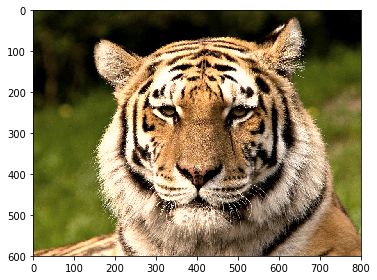

In [21]:
img=imread('https://stepik.org/media/attachments/lesson/60609/tiger-color.png')

img=img_as_float(img)

R=img[:,:,0]
G=img[:,:,1]
B=img[:,:,2]

Y=0.2126*R+0.7152*G+0.0722*B
U=-0.0999*R-0.3360*G+0.4360*B
V=0.6150*R-0.5586*G-0.0563*B

px=int(Y.ravel().shape[0])
n=int(round(px*0.05))

mn=sorted(Y.ravel())[n]
mx=sorted(Y.ravel())[-n]

print(mn,mx)

NY=(Y-mn)*(1/(mx-mn))

NY=clip(NY,0,1)

NR=NY+1.2803*V
NG=NY-0.2148*U-0.3805*V
NB=NY+2.1279*U

nimg=dstack((NR,NG,NB))

nimg=clip(nimg,0,1)

nimg=img_as_ubyte(nimg)

imshow(nimg)

D:\Anaconda\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


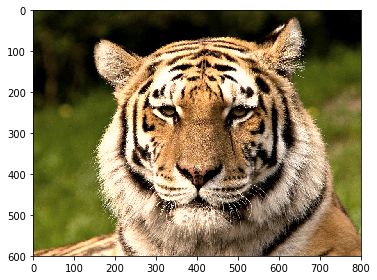

In [22]:
timg=imread('https://stepik.org/media/attachments/lesson/60609/tiger-stable-contrast.png')
imshow(timg)

In [23]:
array_equal(nimg,timg)

True

### Преобразование серого мира

Прочитайте изображение из файла img.png. Примените к нему преобразование серого мира. Для этого:
1. Сконвертируйте изображение в вещественные числа.
2. Подсчитайте коэффициенты rw,gw,bw как описано в видео.
3. Поделите каналы изображения на коэффициенты.
4. Обрежьте значения пикселей, чтобы они не выходили из допустимого диапазона ([0; 255] или [0;1]).
Результат сохраните в файл out_img.png.

В примере входа и выхода указаны ссылки на файлы. Скачав эти файлы, можно протестировать свою программу. Для сравнения вашего ответа с верным используйте функцию numpy.array_equal.

In [24]:
img=imread('https://stepik.org/media/attachments/lesson/60610/railroad.png')
img=img_as_float(img)

D:\Anaconda\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


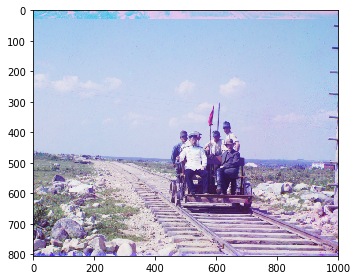

In [25]:
imshow(img)

In [26]:
timg=imread('https://stepik.org/media/attachments/lesson/60610/railroad-gray-world.png')

D:\Anaconda\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


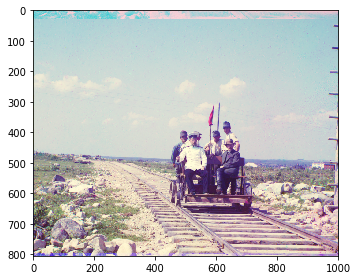

In [27]:
imshow(timg)

In [28]:
R=img[:,:,0]
G=img[:,:,1]
B=img[:,:,2]

In [29]:
avg=(R.mean()+G.mean()+B.mean())/3

In [30]:
rw=R.mean()/avg
gw=G.mean()/avg
bw=B.mean()/avg

In [31]:
NR=R/rw
NG=G/gw
NB=B/bw

In [32]:
nimg=dstack((NR,NG,NB))
nimg=clip(nimg,0,1)
nimg=img_as_ubyte(nimg)

D:\Anaconda\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


D:\Anaconda\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


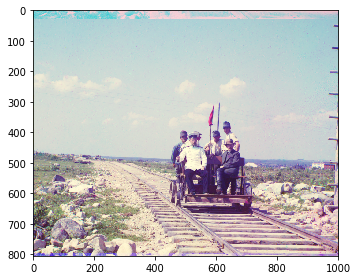

In [33]:
imshow(nimg)

In [34]:
array_equal(nimg,timg)

True

### Выравнивание гистограммы

Прочитайте изображение из файла img.png. Примените к нему выравнивание гистограммы по алгоритму, описанному в слайдах и видео. Работать достаточно в целых числах, помещающихся в байт (т.е. изображение конвертировать не нужно). Результат сохраните в файл out_img.png.

В примере входа и выхода указаны ссылки на файлы. Скачав эти файлы, можно протестировать свою программу. Для сравнения вашего ответа с верным используйте функцию numpy.array_equal.

In [35]:
img=imread('https://stepik.org/media/attachments/lesson/60611/landscape.png')

D:\Anaconda\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


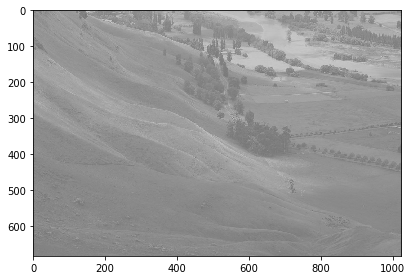

In [36]:
imshow(img)

In [37]:
timg=imread('https://stepik.org/media/attachments/lesson/60611/landscape-histeq.png')

D:\Anaconda\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


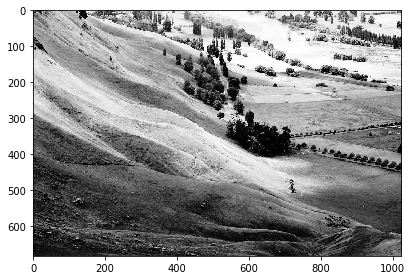

In [38]:
imshow(timg)

In [39]:
import numpy as np

In [40]:
cols=np.zeros(256,np.uint32)
for i in img.ravel():
    cols[i]+=1

In [41]:
cdf=np.zeros(256,np.uint32)
for i in range(256):
    cdf[i]=cdf[i-1]+cols[i]

In [42]:
min_sum=99999

In [43]:
for c in cdf:
    if c != 0 and c < min_sum:
        min_sum=c

In [44]:
p=int(img.ravel().shape[0])

In [45]:
res=img.copy()

In [46]:
for j in range(img.shape[1]):
    for i in range(img.shape[0]):
        pxl=img[i,j]
        res[i][j]=round((cdf[pxl]-min_sum)/(p-1) *255)

D:\Anaconda\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


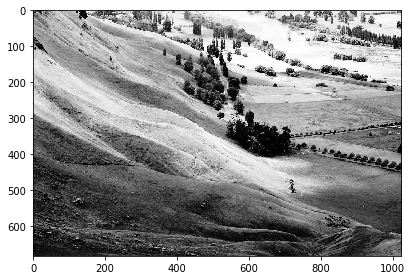

In [47]:
imshow(res)

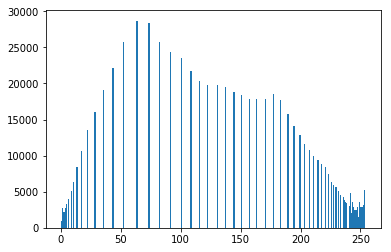

In [57]:
plt.hist(res.ravel(), bins=range(255))
plt.show()

In [49]:
img2 = imread('https://stepik.org/media/attachments/lesson/60611/landscape-histeq.png')
np.array_equal(res, img2)

True